In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('50_Startups.csv')
X = data.iloc[: , :-1].values
y = data.iloc[:, -1].values


In [4]:
#ecnode the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
#index of the column we want to encode, i.e categorical data
ct = ColumnTransformer(transformers = [('encode' , OneHotEncoder(), [3])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))


In [5]:
#splitting test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [6]:
#training the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [7]:
#predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_pred), 1)), axis=1))


[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


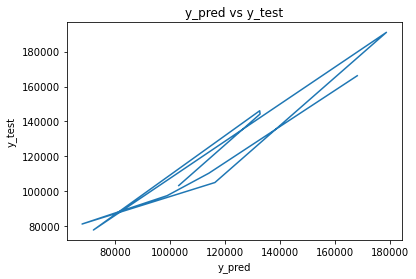

In [8]:
plt.plot(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('y_pred vs y_test')
plt.show()